In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

(253, 200, 3)


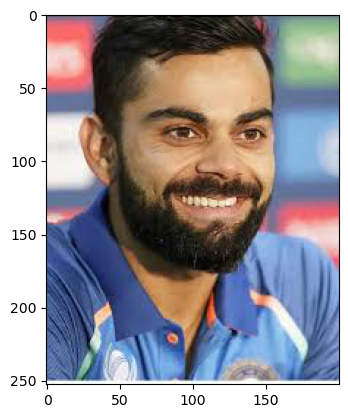

In [2]:
img1 = cv2.imread('/Users/mouriya/Desktop/image_classification_final /Model/test_images/download (4).jpeg')
print(img1.shape)
img= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('on')
plt.show()


In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(253, 200)

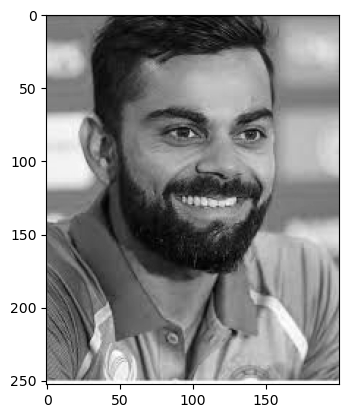

In [4]:
plt.imshow(gray, cmap='gray')
#plt.imshow(img)
plt.axis('on')
plt.show()


In [5]:
face_cascade = cv2.CascadeClassifier('/Users/mouriya/Desktop/image_classification_final /Model/opencv-haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/mouriya/Desktop/image_classification_final /Model/opencv-haarcascade/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

faces

array([[ 49,  29, 131, 131]], dtype=int32)

In [6]:
(x,y,w,h) = faces[0]
x,y,w,h

(49, 29, 131, 131)

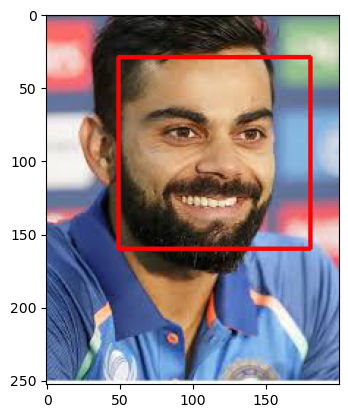

In [7]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.axis('on')
plt.show()

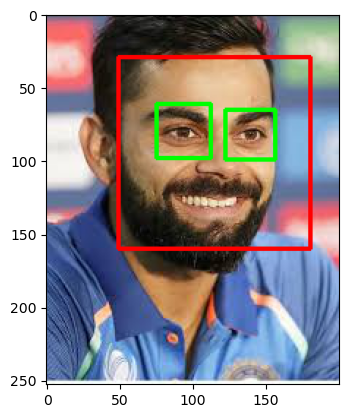

In [8]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

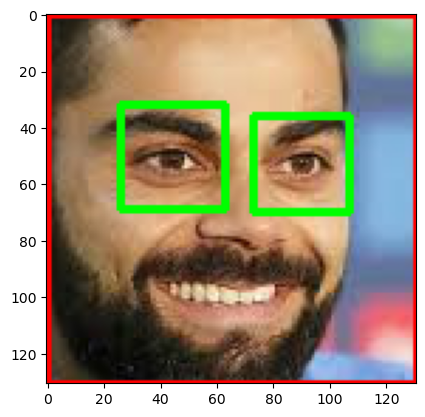

In [9]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show()

In [10]:
cropped_img = np.array(roi_color)
cropped_img.shape

(131, 131, 3)

# below function will return cropped image if the face and two eyes are detected else it will return none

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image not found or could not be loaded: {image_path}")
        return None
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_color)
        if len(eyes) >= 2:
            return roi_color
    return None


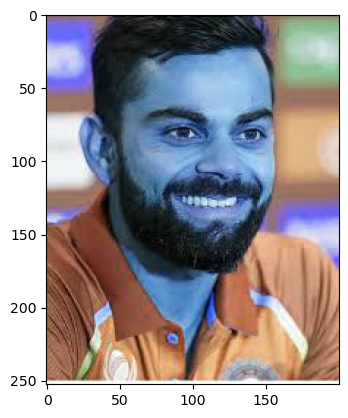

In [12]:
original_image = cv2.imread('/Users/mouriya/Desktop/image_classification_final /Model/test_images/download (4).jpeg')
plt.imshow(original_image)
plt.show()

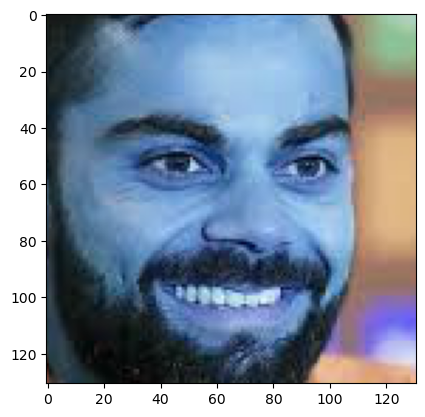

In [13]:
cropped_image = get_cropped_image_if_2_eyes('/Users/mouriya/Desktop/image_classification_final /Model/test_images/download (4).jpeg')
plt.imshow(cropped_image)
plt.show()

In [23]:
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"

In [24]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [25]:
img_dirs

['./datasets/cristiano_ronaldo',
 './datasets/kane_williamson',
 './datasets/sania_mirza',
 './datasets/Virat_kholi',
 './datasets/pat_cummins']

In [26]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [27]:
cropped_image_dirs = []
person_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    person_name = img_dir.split('/')[-1]
    print(person_name)
    
    person_file_names_dict[person_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + person_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = person_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            person_file_names_dict[person_name].append(cropped_file_path)
            count += 1    

cristiano_ronaldo
Generating cropped images in folder:  ./datasets/cropped/cristiano_ronaldo
Image not found or could not be loaded: ./datasets/cristiano_ronaldo/.DS_Store
Image not found or could not be loaded: ./datasets/cristiano_ronaldo/_330603286208.webp
Image not found or could not be loaded: ./datasets/cristiano_ronaldo/cristiano-ronaldo.webp
Image not found or could not be loaded: ./datasets/cristiano_ronaldo/b536d4af20a24e348e201518518f74ac.webp
kane_williamson
Generating cropped images in folder:  ./datasets/cropped/kane_williamson
Image not found or could not be loaded: ./datasets/kane_williamson/.DS_Store
Image not found or could not be loaded: ./datasets/kane_williamson/Kane-Williamson-2021.webp
Image not found or could not be loaded: ./datasets/kane_williamson/4330.webp
Image not found or could not be loaded: ./datasets/kane_williamson/382745.4.webp
sania_mirza
Generating cropped images in folder:  ./datasets/cropped/sania_mirza
Image not found or could not be loaded: ./d

# Wavelet transformation

In [28]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

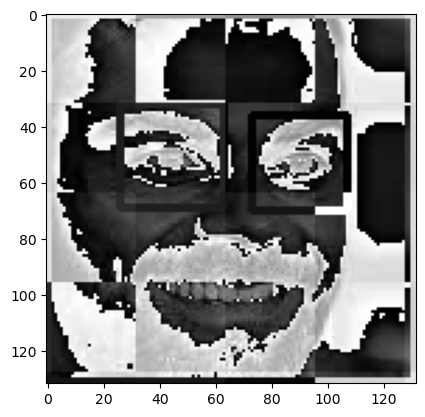

In [29]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')
plt.show()

In [30]:
person_file_names_dict

{'cristiano_ronaldo': ['./datasets/cropped/cristiano_ronaldo/cristiano_ronaldo1.png',
  './datasets/cropped/cristiano_ronaldo/cristiano_ronaldo2.png',
  './datasets/cropped/cristiano_ronaldo/cristiano_ronaldo3.png',
  './datasets/cropped/cristiano_ronaldo/cristiano_ronaldo4.png',
  './datasets/cropped/cristiano_ronaldo/cristiano_ronaldo5.png',
  './datasets/cropped/cristiano_ronaldo/cristiano_ronaldo6.png',
  './datasets/cropped/cristiano_ronaldo/cristiano_ronaldo7.png',
  './datasets/cropped/cristiano_ronaldo/cristiano_ronaldo8.png',
  './datasets/cropped/cristiano_ronaldo/cristiano_ronaldo9.png',
  './datasets/cropped/cristiano_ronaldo/cristiano_ronaldo10.png',
  './datasets/cropped/cristiano_ronaldo/cristiano_ronaldo11.png',
  './datasets/cropped/cristiano_ronaldo/cristiano_ronaldo12.png',
  './datasets/cropped/cristiano_ronaldo/cristiano_ronaldo13.png',
  './datasets/cropped/cristiano_ronaldo/cristiano_ronaldo14.png',
  './datasets/cropped/cristiano_ronaldo/cristiano_ronaldo15.png'

In [31]:
class_dict = {}
count = 0
for person_name in person_file_names_dict.keys():
    class_dict[person_name] = count
    count = count + 1
class_dict

{'cristiano_ronaldo': 0,
 'kane_williamson': 1,
 'sania_mirza': 2,
 'Virat_kholi': 3,
 'pat_cummins': 4}

**Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now**

**1.raw images will provide imformation about image's shape,colour,layout.** 
  **2.wavelet images will provide the information the images's texture,edges and fine detailes**

the purpose is to make the models training more robust 

In [58]:
#this function will read the images in cropped dict and stack the cropped raw img and wavelet img so that 
#machine get trained with both from raw image and wavelet image them vertically
import os

X, y = [], []
for person_name, training_files in person_file_names_dict.items():
    for training_image in training_files:
        # Check if the file exists before trying to load it
        if not os.path.exists(training_image):
            print(f"File not found: {training_image}")
            continue
        
        # Try reading the image
        img = cv2.imread(training_image)
        if img is None:
            print(f"Could not read image: {training_image}")
            continue
        
        try:
            # Resize raw image
            scalled_raw_img = cv2.resize(img, (32, 32))

            # Apply wavelet transform and resize the result
            img_har = w2d(img, 'db1', 5)
            scalled_img_har = cv2.resize(img_har, (32, 32))

            # Stack the images vertically and add to the dataset
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
            X.append(combined_img)
            
            # Append corresponding label
            y.append(class_dict[person_name])

        except Exception as e:
            # Catch any errors during image processing and log the issue
            print(f"Error processing image {training_image}: {e}")
            continue


File not found: ./datasets/cropped/sania_mirza/sania_mirza1.png
File not found: ./datasets/cropped/sania_mirza/sania_mirza2.png
File not found: ./datasets/cropped/sania_mirza/sania_mirza22.png
File not found: ./datasets/cropped/sania_mirza/sania_mirza23.png
File not found: ./datasets/cropped/sania_mirza/sania_mirza24.png
File not found: ./datasets/cropped/sania_mirza/sania_mirza25.png
File not found: ./datasets/cropped/sania_mirza/sania_mirza33.png
File not found: ./datasets/cropped/sania_mirza/sania_mirza37.png
File not found: ./datasets/cropped/sania_mirza/sania_mirza41.png
File not found: ./datasets/cropped/sania_mirza/sania_mirza48.png
File not found: ./datasets/cropped/sania_mirza/sania_mirza51.png
File not found: ./datasets/cropped/sania_mirza/sania_mirza54.png
File not found: ./datasets/cropped/sania_mirza/sania_mirza56.png
File not found: ./datasets/cropped/sania_mirza/sania_mirza68.png
File not found: ./datasets/cropped/pat_cummins/pat_cummins11.png
File not found: ./datasets/

In [59]:
len(X)   # no.of images in the cropped folder

246

In [60]:
len(X[0])   # size of each img  [32*32*3 +32*32] and this is the size of both raw img and wavelet img

4096

In [61]:
y[0]

0

In [62]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(246, 4096)

In [63]:
X[0]

array([ 72.,  60.,  58., ...,  64.,  16., 240.])

In [64]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7903225806451613

In [66]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.67      0.57      0.62         7
           2       0.88      0.88      0.88        24
           3       1.00      0.85      0.92        13
           4       0.56      0.71      0.62         7

    accuracy                           0.79        62
   macro avg       0.75      0.75      0.75        62
weighted avg       0.80      0.79      0.79        62



In [67]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [68]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [69]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/Users/mouriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mouriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mouriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mouriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWar

,model,best_score,best_params
0,svm,0.918619,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.761261,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.951051,{'logisticregression__C': 1}


In [71]:
best_estimators


{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [72]:
best_estimators['svm'].score(X_test,y_test)


0.8709677419354839

In [73]:
best_estimators['random_forest'].score(X_test,y_test)


0.6612903225806451

In [74]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.8709677419354839

In [75]:
best_clf = best_estimators['svm']


In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  0,  1,  0,  1],
       [ 0,  6,  0,  0,  1],
       [ 2,  0, 21,  0,  1],
       [ 0,  1,  0, 12,  0],
       [ 1,  0,  0,  0,  6]])

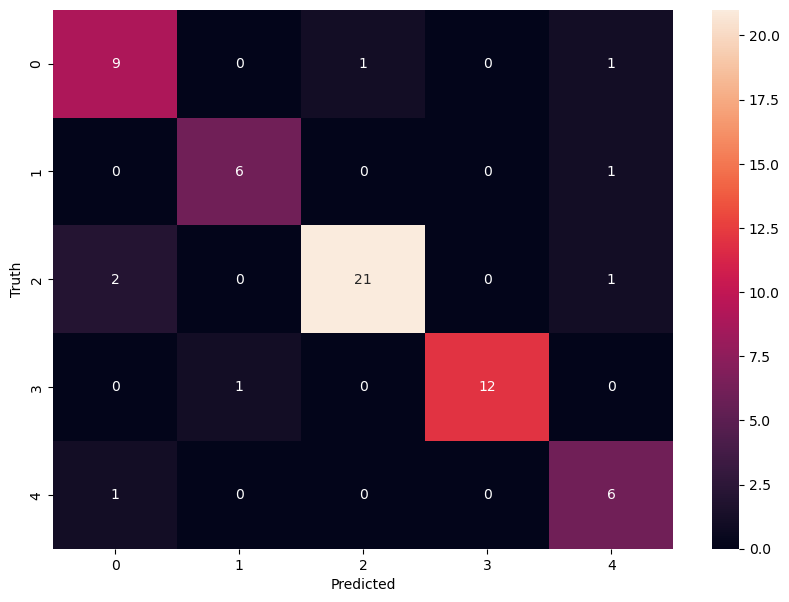

In [77]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [78]:
class_dict


{'cristiano_ronaldo': 0,
 'kane_williamson': 1,
 'sania_mirza': 2,
 'Virat_kholi': 3,
 'pat_cummins': 4}

#Save the trained Model

In [79]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model_1.pkl') 

['saved_model_1.pkl']

#Saving Class dictionary

In [80]:
import json
with open("class_dictionary_1.json","w") as f:
    f.write(json.dumps(class_dict))

In [81]:
import cv2

file_path = "./test_images/download.jpg"  # or absolute path
img = cv2.imread(file_path)

if img is not None:
    print("Image loaded successfully!")
else:
    print("Failed to load image. Check the path.")


Failed to load image. Check the path.


[ WARN:0@7222.099] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./test_images/download.jpg'): can't open/read file: check file path/integrity


In [85]:
import os
print(os.path.abspath("./test_img/download (4).jpg"))


/Users/mouriya/Desktop/image_classification_final /Model/test_img/download (4).jpg
